# Case Study on Regression
* The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making. 
* Find the best linear relationship between year and price.
* Can you predict the possible price of a 2022 model second-hand grand i10?
* Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better.

In [22]:
# import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# import dataset
df=pd.read_csv(r"G:\course\ICT academy\Case Study\2\car_age_price.csv")
df.head(3)

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000


## 1.EDA

In [5]:
df.shape

(112, 2)

In [6]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [8]:
df.isnull().sum().sum()

0

## 2. Data Preprocessing 

In [9]:
df.skew()

Year    -0.188254
Price   -0.080711
dtype: float64

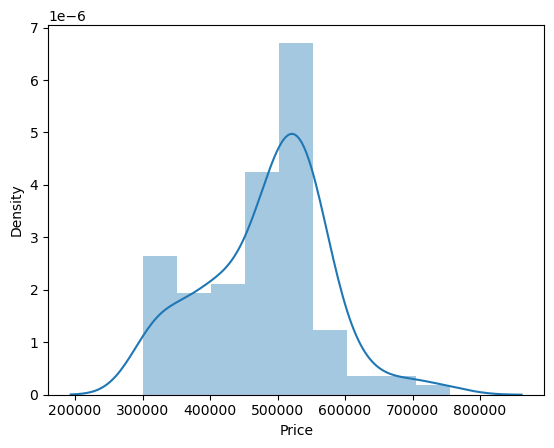

In [10]:
sns.distplot(df['Price'])
plt.show()

In [11]:
UL=df['Price'].mean() + 3*df['Price'].std()
LL=df['Price'].mean() - 3*df['Price'].std()
df1=df[(df['Price']<UL)&(df['Price']>LL)]
df1.shape
# no outliers

(112, 2)

In [12]:
X=df['Year']
y=df["Price"]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=2)

In [14]:
X_train.shape

(75,)

## 3. Linear Regression

In [15]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

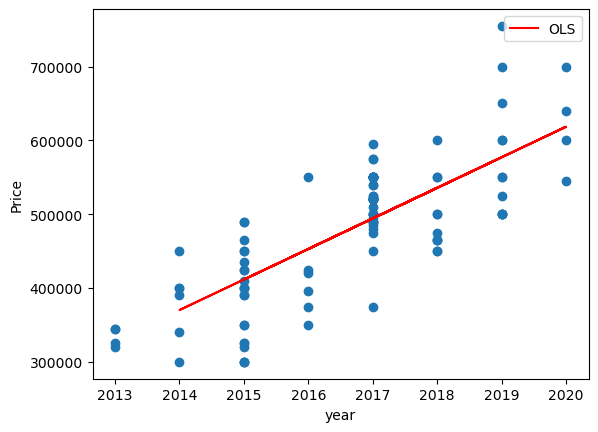

In [24]:
plt.scatter(X,y)
plt.xlabel("year")
plt.ylabel("Price")
plt.plot(X_test,y_pred,color='red',label='OLS')
plt.legend()
plt.show()

### 3.1. Predicting car prices for 2022 make

In [23]:
m = lr.coef_
b = lr.intercept_
pred=m*2022 + b
print("predicted price of a 2022 model second-hand grand i10 is :",pred)

predicted price of a 2022 model second-hand grand i10 is : [701178.48933515]


## 4. Lasso Regression

In [45]:
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(X_train,y_train)
y_pred1=la.predict(X_test)

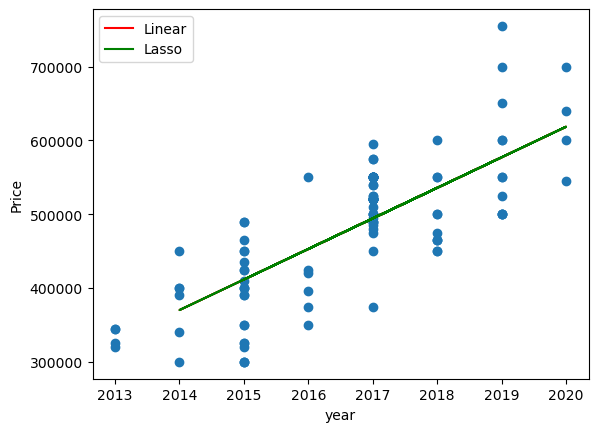

In [46]:
plt.scatter(X,y)
plt.xlabel("year")
plt.ylabel("Price")
plt.plot(X_test,y_pred,color='red',label='Linear')
plt.plot(X_test,y_pred1,color='green',label='Lasso')
plt.legend()
plt.show()

## 5. Performance 

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

reg=[lr,la]
for i in reg:
    print(i,"\n")
    i.fit(X_train,y_train)
    y_pred2=i.predict(X_test)
    
    MAE = mean_absolute_error(y_test,y_pred2)
    print("MAE = ",MAE)
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred2))
    print("RMSE = ",RMSE)
    R2_score = r2_score(y_test,y_pred2)
    print("R2_score = ",R2_score)
    print("Training score:", i.score(X_train, y_train))
    print("Testing score:", i.score(X_test, y_test))
    print("_"*50,"\n")

LinearRegression() 

MAE =  48549.94666064712
RMSE =  57434.8053442664
R2_score =  0.5303898713894553
Training score: 0.5966251458644161
Testing score: 0.5303898713894553
__________________________________________________ 

Lasso() 

MAE =  48550.072701928184
RMSE =  57434.92351438257
R2_score =  0.5303879389744253
Training score: 0.5966251458215284
Testing score: 0.5303879389744253
__________________________________________________ 



* The error in terms of price is around **48 K**
* The model only explains **53 %** of the relationship between the dependent and independent variables.
* There is no visible improvement in performance between the 2 models